<a href="https://colab.research.google.com/github/JANANI-B-S/Handwritten-Digit-Recognition-/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8640 - loss: 0.4714
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9553 - loss: 0.1484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9682 - loss: 0.1050
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9728 - loss: 0.0884
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9772 - loss: 0.0703


Saving IMG20241009213610.jpg to IMG20241009213610.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


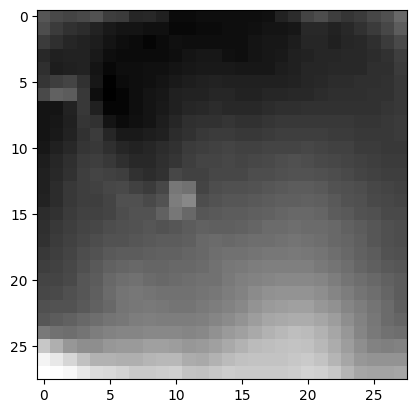

Predicted Digit: 3


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Ask user to upload an image
uploaded = files.upload()

# Process the uploaded image
for filename in uploaded.keys():
    # Open the uploaded image
    img = Image.open(filename).convert('L')

    # Resize the image to 28x28 (the size MNIST dataset uses)
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Normalize the image array to [0, 1]
    img_array = img_array / 255.0

    # Reshape the image to match the model input shape (28x28, 1 channel)
    img_array = np.expand_dims(img_array, axis=0)

    # Make the prediction
    predictions = model.predict(img_array)

    # Get the predicted digit
    predicted_digit = np.argmax(predictions[0])

    # Show the image and print the predicted digit
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    print(f"Predicted Digit: {predicted_digit}")